In [7]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

In [16]:
#Read CSV
elections = pd.read_csv("./data/processed/elections.csv")
dem = pd.read_csv("./data/processed/dem_cleaned.csv")
rep = pd.read_csv("./data/processed/rep_cleaned.csv", encoding='latin-1')

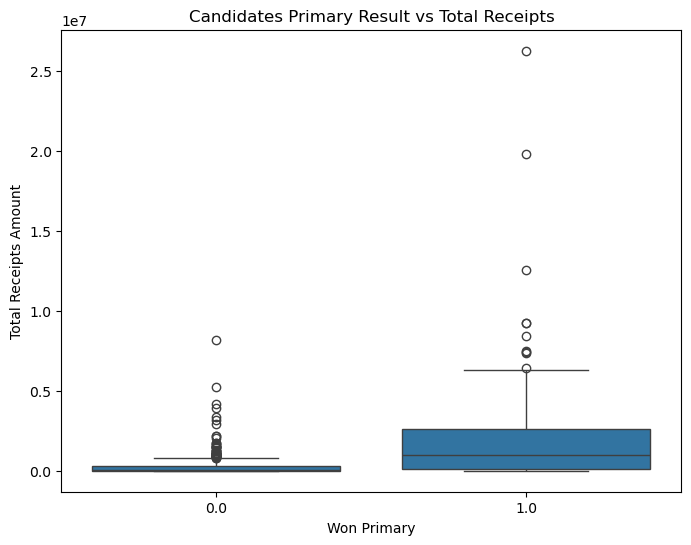

Summary Statistics:
              count          mean           std  min          25%        50%  \
Won Primary                                                                   
0.0          441.0  2.999632e+05  6.824341e+05  0.0    4270.0000   52578.08   
1.0          198.0  2.032070e+06  3.103932e+06  0.0  100635.7775  977500.94   

                      75%          max  
Won Primary                             
0.0          3.184128e+05   8182261.80  
1.0          2.610309e+06  26242152.35  


In [17]:
#Create graph
plt.figure(figsize=(8, 6))

#Plot graph
sns.boxplot(x='Won Primary', y='Total_Receipt', data=elections)

#Label graph
plt.title('Candidates Primary Result vs Total Receipts')
plt.ylabel('Total Receipts Amount')
plt.show()

grouped = elections.groupby('Won Primary')['Total_Receipt']
stats = grouped.describe()

# Print the summary statistics
print("Summary Statistics:\n", stats)

In [18]:
#Reset index
state_totals = elections.groupby('Cand_Office_St')['Total_Receipt'].sum().reset_index()

#Plot graph
fig = px.choropleth(
    state_totals,
    locations='Cand_Office_St',
    locationmode='USA-states',
    color='Total_Receipt',
    scope="usa",
    labels={'Total_Receipt':'Total Funding'}
)

#Label graph
fig.update_layout(title_text = 'Total Campaign Funding by State')
fig.show()

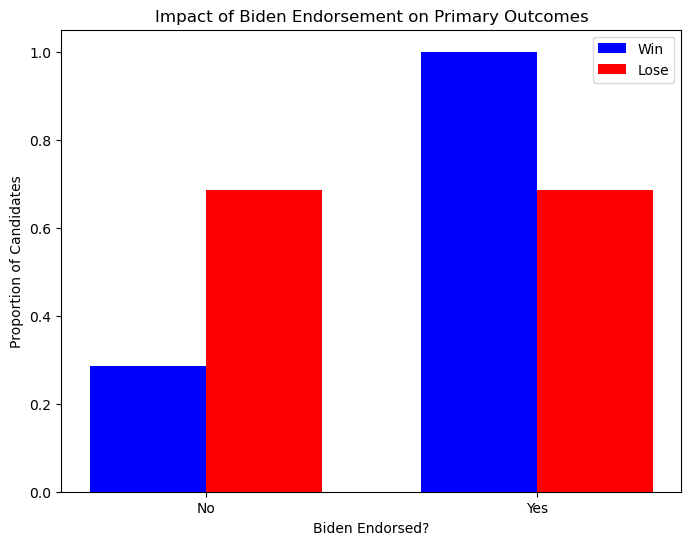

In [19]:
#Filter the data for Candidates who received and did not receive a Trump Endorsement
won_primary_biden_candidates = dem[dem['Won Primary'] == 'Yes']
lose_primary_biden_candidates = dem[dem['Won Primary'] == 'No']

#Count the number of Candidates who won or lost in the primary for each group
biden_endorsed_primary_outcomes = won_primary_biden_candidates['Biden Endorsed?'].value_counts() /  np.array([sum(dem['Biden Endorsed?'] == 'No'), sum(dem['Biden Endorsed?'] == 'Yes')])
non_biden_endorsed_primary_outcomes = lose_primary_biden_candidates['Biden Endorsed?'].value_counts() / np.array([sum(dem['Biden Endorsed?'] == 'No')])

#Create graph
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = range(len(biden_endorsed_primary_outcomes))

#Plot graph
plt.bar(index, biden_endorsed_primary_outcomes, bar_width, label='Win', color='b')
plt.bar([i + bar_width for i in index], non_biden_endorsed_primary_outcomes, bar_width, label='Lose', color='r')

#Label graph
plt.title('Impact of Biden Endorsement on Primary Outcomes')
plt.xlabel('Biden Endorsed?')
plt.ylabel('Proportion of Candidates')
plt.xticks([i + bar_width/2 for i in index], biden_endorsed_primary_outcomes.index)
plt.legend()
plt.show()

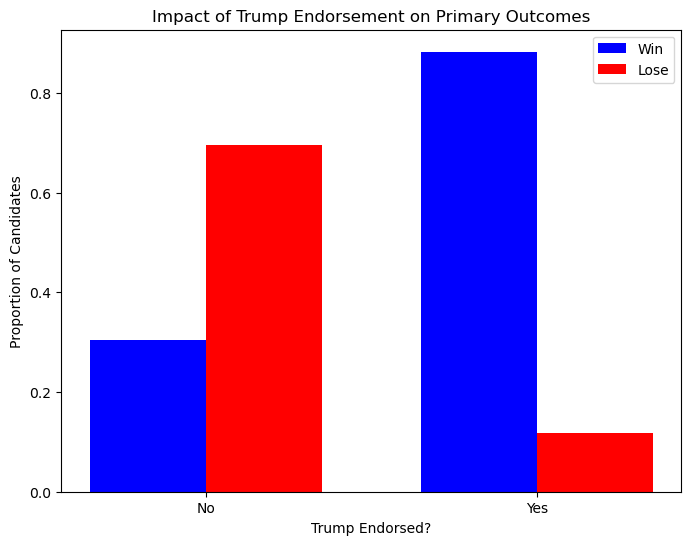

In [20]:
#Filter the data for Candidates who received and did not receive a Trump Endorsement
won_primary_trump_candidates = rep[rep['Won Primary'] == 'Yes']
lose_primary_trump_candidates = rep[rep['Won Primary'] == 'No']

#Count the number of Candidates who won or lost in the primary for each group
trump_endorsed_primary_outcomes = won_primary_trump_candidates['Trump Endorsed?'].value_counts() /  np.array([sum(rep['Trump Endorsed?'] == 'No'), sum(rep['Trump Endorsed?'] == 'Yes')])
non_trump_endorsed_primary_outcomes = lose_primary_trump_candidates['Trump Endorsed?'].value_counts() /  np.array([sum(rep['Trump Endorsed?'] == 'No'), sum(rep['Trump Endorsed?'] == 'Yes')])

#Create graph
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = range(len(trump_endorsed_primary_outcomes))

#Plot graph
plt.bar(index, trump_endorsed_primary_outcomes, bar_width, label='Win', color='b')
plt.bar([i + bar_width for i in index], non_trump_endorsed_primary_outcomes, bar_width, label='Lose', color='r')

#Label graph
plt.title('Impact of Trump Endorsement on Primary Outcomes')
plt.xlabel('Trump Endorsed?')
plt.ylabel('Proportion of Candidates')
plt.xticks([i + bar_width/2 for i in index], trump_endorsed_primary_outcomes.index)
plt.legend()
plt.show()